<a href="https://colab.research.google.com/github/12Brainer/aa-bankmarketing-regresion/blob/main/TP02_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumnos:
Brainer Fallas Prado,
Raamses Olivier Martinez Gutierrez

---



# **1. Diseñe su experimento:**(5 puntos) Describa en detalle el flujo de trabajo completo para realizar su experimento.

Diseño del Experimento de Regresión para el Dataset bank-full
1. Objetivo del experimento:
Predecir un valor numérico relacionado con los clientes bancarios usando las variables disponibles en el dataset bank-full. Por ejemplo, estimar la probabilidad de respuesta a una campaña o una variable continua derivada (como el monto de un depósito).

2. Preparación de los datos:

Exploración inicial:

Análisis estadístico de las variables numéricas y categóricas.

Identificación y tratamiento de valores faltantes o inconsistentes.

Análisis de balance en la variable objetivo (en regresión, observar distribución y rangos).

Preprocesamiento:

Codificación de variables categóricas (OneHotEncoder o similar).

Escalado de variables numéricas (MinMaxScaler) para facilitar el aprendizaje del modelo.

3. División del conjunto de datos:

Separar los datos en conjunto de entrenamiento (80%) y conjunto de evaluación (20%), asegurando que la distribución de la variable objetivo se mantenga representativa (puede usarse estratificación si la variable es categórica o agrupada).

4. Selección y entrenamiento de modelos:

Probar modelos de regresión como:

Árboles de decisión para regresión.

Random Forest Regressor.

Redes neuronales (MLPRegressor).

Ajustar hiperparámetros relevantes, como profundidad del árbol o número de estimadores.

5. Validación y evaluación:

Utilizar validación cruzada repetida (por ejemplo, RepeatedKFold) para estimar la performance promedio y estabilidad.

Métricas para evaluar el desempeño:

Precisión.

Recall.

F1.


In [ ]:
!pip install category-encoders

In [ ]:
# General libraries
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import category_encoders as ce

# Form Scikit-Learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score


# Anomalies detection
from sklearn.ensemble import RandomForestClassifier

# From Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

# Graphics
import matplotlib.pyplot as plt

**2. Preprocesamiento**
- a) (2 puntos) Describa el conjunto de datos y referencie la fuente. El conjunto de datos debe tener al menos 3000 registros y al menos ocho atributos.
- b) Cargue el conjunto de datos.
- c) (2 puntos) Explore el conjunto de datos, visualice algunas estadísticas (incluya un análisis del balance de las clases), limpie el conjunto de datos, verifique que no existan valores faltantes y codifique las variables categóricas.
- d) (2 puntos) Escale los datos.
- e) (1 punto) Separe los datos en datos de entrenamiento y evaluación (80/20% respectivamente).

a) (2 puntos) Describa el conjunto de datos y referencie la fuente. El conjunto de datos debe tener al menos 3000 registros y al menos ocho atributos.

Contiene 45,211 registros y 17 atributos de una campaña de marketing directo de un banco, incluyendo datos demográficos, financieros y de contacto. La variable objetivo (y) indica si el cliente suscribió un depósito a plazo fijo.
Fuente: Kaggle – Bank Marketing Dataset. Disponible en: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

b) Cargue el conjunto de datos.

In [ ]:
df = pd.read_csv('bank-full.csv', encoding='utf-8', sep=';')

# Dimensiones del dataset

# Número de filas
print("Filas: ", df.shape[0])

# Número de columnas
print("Columnas: ", df.shape[1])

# Columnas del dataset
print("Columnas: ", df.columns.to_list())

# Elementos estadísticos
print(df.describe())

# Detectar elementos nulos en las columnas del dataframe
df.isna().any()

Filas:  45211
Columnas:  17
Columnas:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  

,0
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
contact,False
day,False


c) (2 puntos) Explore el conjunto de datos, visualice algunas estadísticas (incluya un análisis del balance de las clases), limpie el conjunto de datos, verifique que no existan valores faltantes y codifique las variables categóricas.

In [ ]:
# Análisis del balance de clases
# Los resultados muestra un desbalance de clases en el target debido a que hay más registros de una clase que de la otra
df.y.value_counts()

,count
y,
no,39922
yes,5289


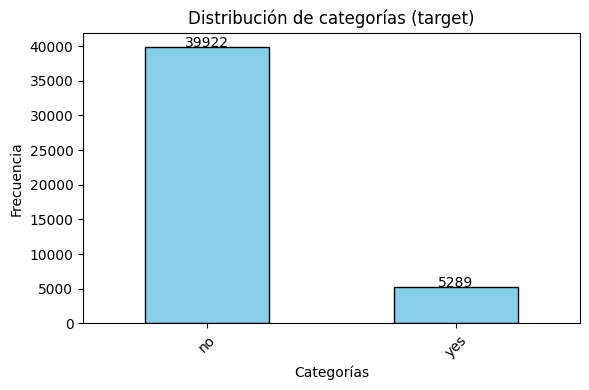

In [ ]:
# Mostramos un gráfico de distribución de las categorías
# Conteo de categorías
conteo = df.y.value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
conteo.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Distribución de categorías (target)')
plt.xticks(rotation=45)

# Mostrar valores encima de las barras
for i, valor in enumerate(conteo):
    plt.text(i, valor + 0.5, str(valor), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Obteniendo conteo y lista de valores únicos por columna
for col in df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos ({df[col].nunique()}): {df[col].unique()}")
    print("-" * 40)

Columna: age
Valores únicos (77): [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
----------------------------------------
Columna: job
Valores únicos (12): ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------
Columna: marital
Valores únicos (3): ['married' 'single' 'divorced']
----------------------------------------
Columna: education
Valores únicos (4): ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------
Columna: default
Valores únicos (2): ['no' 'yes']
----------------------------------------
Columna: balance
Valores únicos (7168): [ 2143    29     2 ...  8205 14204 16353]
----------------------------------------
Columna: housin

In [ ]:
# Encoding de target
y = df["y"]
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# Identificar columnas categóricas que contienen texto
df = df.drop(columns=["y"])
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Columnas categóricas detectadas (textuales):", cat_cols)

Columnas categóricas detectadas (textuales): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
# Aplicar OneHotEncoder a todas esas columnas
encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True, return_df=True)
df = encoder.fit_transform(df)
print(df)

       age  job_management  job_technician  job_entrepreneur  job_blue-collar  \
0       58               1               0                 0                0   
1       44               0               1                 0                0   
2       33               0               0                 1                0   
3       47               0               0                 0                1   
4       33               0               0                 0                0   
...    ...             ...             ...               ...              ...   
45206   51               0               1                 0                0   
45207   71               0               0                 0                0   
45208   72               0               0                 0                0   
45209   57               0               0                 0                1   
45210   37               0               0                 1                0   

       job_unknown  job_ret

In [ ]:
# Verificar que solo existan features numéricas
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
assert len(cat_cols) == 0, "Se han detectado columnas con texto"

d) (2 puntos) Escale los datos.

In [ ]:
# Rescaling de matriz de features (separando el target temporalmente)
features_to_scale = df
scaler = MinMaxScaler().fit(features_to_scale)
scaled_features = scaler.transform(features_to_scale)

# Reconstrucción del dataframe con base en los nuevos valores rescalados
df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df["y"] = y_encoded
print(df)

            age  job_management  job_technician  job_entrepreneur  \
0      0.519481             1.0             0.0               0.0   
1      0.337662             0.0             1.0               0.0   
2      0.194805             0.0             0.0               1.0   
3      0.376623             0.0             0.0               0.0   
4      0.194805             0.0             0.0               0.0   
...         ...             ...             ...               ...   
45206  0.428571             0.0             1.0               0.0   
45207  0.688312             0.0             0.0               0.0   
45208  0.701299             0.0             0.0               0.0   
45209  0.506494             0.0             0.0               0.0   
45210  0.246753             0.0             0.0               1.0   

       job_blue-collar  job_unknown  job_retired  job_admin.  job_services  \
0                  0.0          0.0          0.0         0.0           0.0   
1              

(1 punto) Separe los datos en datos de entrenamiento y evaluación (80/20% respectivamente).


In [ ]:
# Separación de conjuntos de datos
# train_test_split, particiona los datos

X = df.drop(columns=["y"])
y = df["y"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Árboles de decisión**
- f) (2 puntos) Utilice árboles de decisión para resolver el problema de clasificación.
- g) (2 puntos) Utilice validación cruzada para evaluar la precision, el recall y el F1 de los modelos generados.
- h) (5 puntos) Realice el ejercicio con al menos 5 niveles diferentes de profundidad de árboles (max_depth) y recomiende cuál es la mejor configuración para este parámetro con el conjunto de datos seleccionado.
- i) (3 puntos) Imprima el árbol con la profundidad que genera el mejor desempeño, explique la estructura del árbol (sobre todo qué significan las hojas) y clasifique alguna muestra del conjunto de datos. Explique la ruta que siguió en el árbol y el resultado obtenido.

(2 puntos) Utilice árboles de decisión para resolver el problema de clasificación.*italicized text*

In [ ]:
# Árbol de decisión
treeM = DecisionTreeClassifier(max_depth=2, random_state=42)
treeM.fit(X, y) # entrenamiento del árbol

# Se utiliza el método predict para obtener predicciones
print("Predicciones")
print(treeM.predict(X))
print("====================================================")
print("Probabilidades de que una muestra pertenezca a una clase del target")
# si queremos saber las probabilidades podemos usar el método predict_proba
print( treeM.predict_proba(X))

Predicciones
[0 0 0 ... 1 0 0]
Probabilidades de que una muestra pertenezca a una clase del target
[[0.94091061 0.05908939]
 [0.94091061 0.05908939]
 [0.94091061 0.05908939]
 ...
 [0.41863075 0.58136925]
 [0.94091061 0.05908939]
 [0.94091061 0.05908939]]


(2 puntos) Utilice validación cruzada para evaluar la precision, el recall y el F1 de los modelos generados.

In [ ]:
# Obtención de métricsa recall, f1 y accuracy a partir de la matriz de confusión
""""
→ De todos los casos que el modelo predijo como positivos, el 66.8% realmente lo eran.
→ De todos los casos que realmente eran positivos, el modelo detectó correctamente el 30.4%.
→ Es la media armónica entre precisión y recall, un balance que penaliza si una de las dos es muy baja.

Tu modelo es bastante preciso cuando predice positivos (pocas falsas alarmas).

Pero se está perdiendo muchos positivos reales (recall bajo).

F1 bajo porque recall está limitando el balance.
"""
cross_validator = cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
classifier = clf = treeM # pasamos el modelo clasificador que se quiere evaluar; en este caso, el modelo de árbol creado anteriormente


# Métricas a evaluar
scoring = ['precision', 'recall', 'f1']

# Evaluación cruzada
resultados = cross_validate(classifier, X, y, scoring=scoring, cv=cv)

for metric in scoring:
    valores = resultados[f'test_{metric}']
    print(f"{metric.capitalize():<10}: {valores.mean():.3f} ± {valores.std():.3f}")

Precision : 0.594 ± 0.024
Recall    : 0.349 ± 0.014
F1        : 0.440 ± 0.015


(5 puntos) Realice el ejercicio con al menos 5 niveles diferentes de profundidad de árboles (max_depth) y recomiende cuál es la mejor configuración para este parámetro con el conjunto de datos seleccionado.

In [ ]:
# Árbol de decisión con diferentes profundidades

"""
Análisis
A medida que aumenta la profundidad, recall mejora notablemente, es decir, el modelo detecta más casos positivos reales.

La precisión disminuye ligeramente, lo que indica que el modelo genera un poco más de falsos positivos a medida que crece la profundidad.

El F1 score, que balancea precisión y recall, alcanza su mejor valor en profundidad 7, con 0.487.

La mejor configuración para max_depth es 7, ya que ofrece el mejor equilibrio entre precisión y recall,
reflejado en el F1 más alto. Esto indica que el modelo con profundidad 7 es capaz de identificar
una mayor proporción de casos positivos reales sin sacrificar demasiado la precisión.
"""

# Usamos la función range para generar las profundidades de 2 en 2, desde 2 hasta 12
for max_depth in range(3, 8):
  print(f"Profundidad máxima del árbol: {max_depth}")
  treeM = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  treeM.fit(X, y) # entrenamiento del árbol
  cross_validator = cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  classifier = clf = treeM # pasamos el modelo clasificador que se quiere evaluar; en este caso, el modelo de árbol creado anteriormente


  # Métricas a evaluar
  scoring = ['precision', 'recall', 'f1']

  # Evaluación cruzada
  resultados = cross_validate(classifier, X, y, scoring=scoring, cv=cv)

  for metric in scoring:
      valores = resultados[f'test_{metric}']
      print(f"{metric.capitalize():<10}: {valores.mean():.3f} ± {valores.std():.3f}")
  print('='*100)



Profundidad máxima del árbol: 3
Precision : 0.648 ± 0.027
Recall    : 0.321 ± 0.027
F1        : 0.429 ± 0.024
Profundidad máxima del árbol: 4
Precision : 0.651 ± 0.029
Recall    : 0.331 ± 0.022
F1        : 0.438 ± 0.020
Profundidad máxima del árbol: 5
Precision : 0.646 ± 0.029
Recall    : 0.344 ± 0.025
F1        : 0.449 ± 0.024
Profundidad máxima del árbol: 6
Precision : 0.622 ± 0.029
Recall    : 0.384 ± 0.032
F1        : 0.474 ± 0.027
Profundidad máxima del árbol: 7
Precision : 0.617 ± 0.025
Recall    : 0.403 ± 0.023
F1        : 0.487 ± 0.019


(3 puntos) Imprima el árbol con la profundidad que genera el mejor desempeño, explique la estructura del árbol (sobre todo qué significan las hojas) y clasifique alguna muestra del conjunto de datos. Explique la ruta que siguió en el árbol y el resultado obtenido.

"\nCada línea corresponde a un nodo del árbol y tiene este formato:\nText(x_pos, y_pos, 'condición o información del nodo')\n\nDonde dentro del texto tienes información del nodo como:\n\nx[i] <= valor:\nCondición para dividir en ese nodo; x[i] es la feature i-ésima, y el árbol decide ir a la rama izquierda si la condición se cumple, a la derecha si no.\n\ngini = valor:\nÍndice de Gini del nodo, mide qué tan mezcladas están las clases (0 = puro, 0.5 máximo desorden para dos clases).\n\nsamples = n:\nNúmero de muestras que llegan a ese nodo.\n\nvalue = [n_clase0, n_clase1]:\nCantidad de ejemplos de cada clase en ese nodo.\n\n"

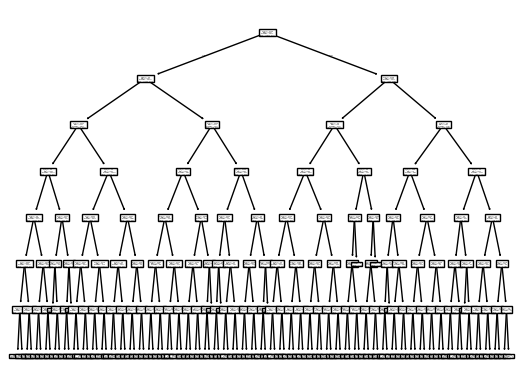

In [ ]:
# Graficar el modelo de árbol de decisión con la mejor configuración
# Visualizar el árbol
tree.plot_tree(treeM, )


"""
Cada línea corresponde a un nodo del árbol y tiene este formato:
Text(x_pos, y_pos, 'condición o información del nodo')

Donde dentro del texto tienes información del nodo como:

x[i] <= valor:
Condición para dividir en ese nodo; x[i] es la feature i-ésima, y el árbol decide ir a la rama izquierda si la condición se cumple, a la derecha si no.

gini = valor:
Índice de Gini del nodo, mide qué tan mezcladas están las clases (0 = puro, 0.5 máximo desorden para dos clases).

samples = n:
Número de muestras que llegan a ese nodo.

value = [n_clase0, n_clase1]:
Cantidad de ejemplos de cada clase en ese nodo.

"""

In [ ]:
# Clasifique alguna muestra del conjunto de datos. Explique la ruta que siguió en el árbol y el resultado obtenido.
"""
El árbol evalúa cada condición desde la raíz.
Para cada nodo, según el valor de la característica, decide ir por la rama izquierda (si cumple la condición) o derecha.
Cuando llega a la hoja, asigna la clase mayoritaria de ese nodo.
La clase predicha es la que devuelve predict.
"""



muestra = X.iloc[0].values.reshape(1, -1) # se toma la primer muestra del conjunto de datos
node_indicator = treeM.decision_path(muestra)
nodos_recorridos = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
print("Nodos recorridos en el árbol:", nodos_recorridos)

feature = treeM.tree_.feature
threshold = treeM.tree_.threshold

for node_id in nodos_recorridos:
    if feature[node_id] != -2:  # -2 significa nodo hoja
        f = feature[node_id]
        t = threshold[node_id]
        val = muestra[0, f]
        decision = "izquierda" if val <= t else "derecha"
        print(f"Nodo {node_id}: x[{f}] <= {t:.3f} (valor muestra: {val:.3f}) --> Rama {decision}")
    else:
        print(f"Nodo {node_id}: Hoja")
prediccion = treeM.predict(muestra)
print("Clase predicha:", prediccion[0])


"""
Explicacion de resultados:
El árbol de decisión clasifica una muestra evaluando secuencialmente condiciones sobre
sus características, tomando decisiones en cada nodo para seguir por la rama izquierda o derecha.
Este proceso continúa hasta llegar a una hoja, donde se asigna la clase
mayoritaria según las muestras que allí llegaron. La clase asignada es la predicción final para esa muestra.
"""


Nodos recorridos en el árbol: [ 0  1  2 30 46 47 48 49]
Nodo 0: x[43] <= 0.106 (valor muestra: 0.053) --> Rama izquierda
Nodo 1: x[50] <= 0.500 (valor muestra: 0.000) --> Rama izquierda
Nodo 2: x[43] <= 0.042 (valor muestra: 0.053) --> Rama derecha
Nodo 30: x[23] <= 0.500 (valor muestra: 1.000) --> Rama derecha
Nodo 46: x[45] <= 0.431 (valor muestra: 0.000) --> Rama izquierda
Nodo 47: x[40] <= 0.500 (valor muestra: 0.000) --> Rama izquierda
Nodo 48: x[43] <= 0.080 (valor muestra: 0.053) --> Rama izquierda
Nodo 49: Hoja
Clase predicha: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'\nExplicacion de resultados: \nEl árbol de decisión clasifica una muestra evaluando secuencialmente condiciones sobre \nsus características, tomando decisiones en cada nodo para seguir por la rama izquierda o derecha. \nEste proceso continúa hasta llegar a una hoja, donde se asigna la clase \nmayoritaria según las muestras que allí llegaron. La clase asignada es la predicción final para esa muestra.\n'

**Random Forest**
- j) (2 puntos) Aplique el algoritmo de Random Forest al ejercicio de clasificación.
- k) (2 puntos) Utilice validación cruzada para evaluar la precision, el recall y el F1 de los modelos generados.
- l) (5 puntos) Realice el ejercicio con al menos 5 cantidades diferentes de estimadores (n_estimators) y recomiende cuál es la mejor configuración para este parámetro con el conjunto de datos seleccionado.

(2 puntos) Aplique el algoritmo de Random Forest al ejercicio de clasificación.

In [ ]:
# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Entrenar
rf.fit(x_train, y_train)

# Predecir
y_pred = rf.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 1.]


(2 puntos) Utilice validación cruzada para evaluar la precision, el recall y el F1 de los modelos generados.

In [ ]:
# Validación cruzada
cross_validator = cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
classifier = clf = rf # pasamos el modelo clasificador que se quiere evaluar; en este caso, el modelo de random forest

# Métricas a evaluar
scoring = ['precision', 'recall', 'f1']

# Evaluación cruzada
resultados = cross_validate(classifier, X, y, scoring=scoring, cv=cv)

for metric in scoring:
    valores = resultados[f'test_{metric}']
    print(f"{metric.capitalize():<10}: {valores.mean():.3f} ± {valores.std():.3f}")

Precision : 0.661 ± 0.021
Recall    : 0.411 ± 0.020
F1        : 0.506 ± 0.017


 (5 puntos) Realice el ejercicio con al menos 5 cantidades diferentes de estimadores (n_estimators) y recomiende cuál es la mejor configuración para este parámetro con el conjunto de datos seleccionado.

In [ ]:
# Probando con n-estimators
# Valores de n_estimators a probar
n_estimators_list = [10, 20, 40, 50, 100]

# Validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ['precision', 'recall', 'f1']

mejores_resultados = {}
mejor_f1 = 0
mejor_n = None

for n in n_estimators_list:
    print(f"\nEvaluando RandomForest con n_estimators={n}")
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=42)
    resultados = cross_validate(rf, X, y, scoring=scoring, cv=cv)

    # Calcular medias y desviaciones estándar
    precision_mean = resultados['test_precision'].mean()
    recall_mean = resultados['test_recall'].mean()
    f1_mean = resultados['test_f1'].mean()

    print(f"Precision : {precision_mean:.3f} ± {resultados['test_precision'].std():.3f}")
    print(f"Recall    : {recall_mean:.3f} ± {resultados['test_recall'].std():.3f}")
    print(f"F1        : {f1_mean:.3f} ± {resultados['test_f1'].std():.3f}")

    mejores_resultados[n] = f1_mean

    # Guardar mejor configuración basada en F1
    if f1_mean > mejor_f1:
        mejor_f1 = f1_mean
        mejor_n = n

print("\n=======================================")
print(f"La mejor configuración es n_estimators = {mejor_n} con F1 = {mejor_f1:.3f}")


Evaluando RandomForest con n_estimators=10
Precision : 0.632 ± 0.022
Recall    : 0.358 ± 0.022
F1        : 0.457 ± 0.021

Evaluando RandomForest con n_estimators=50
Precision : 0.656 ± 0.022
Recall    : 0.403 ± 0.021
F1        : 0.499 ± 0.019

Evaluando RandomForest con n_estimators=100
Precision : 0.661 ± 0.021
Recall    : 0.411 ± 0.020
F1        : 0.506 ± 0.017

Evaluando RandomForest con n_estimators=150
Precision : 0.663 ± 0.021
Recall    : 0.412 ± 0.019
F1        : 0.508 ± 0.016

Evaluando RandomForest con n_estimators=200
Precision : 0.665 ± 0.020
Recall    : 0.415 ± 0.018
F1        : 0.511 ± 0.014

La mejor configuración es n_estimators = 200 con F1 = 0.511


**Perceptron multicapa con PyTorch**
- m) (5) Defina un modelo utilizando una **red profunda de perceptrón multicapa** implementada con PyTorch.
- n) (3) Realice el entrenamiento del modelo.
- ñ)(1) Evalúe los resultados del modelo por medio de la precision, el recall y el F1 del modelo.

In [ ]:
# Perceptron multicapa
"""
Se crea una clase para la instanciación de modelos con parámetros
de iniciación como el número de neuronas de la capa de entrada, una lista para
las neuronas de las capas internas, una función de activación y un dropout que
por defecto es cero. Además, al ser modelos de regresión, la capa de salida está conformada por una única neurona.
"""
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dims, activation='relu', dropout=0.0, output_dim=1):
        """
        Parámetros:
        - input_dim: Número de características de entrada.
        - hidden_dims: Lista con los tamaños de cada capa oculta (ej. [64] o [64, 32, 16]).
        - activation: 'relu' o 'tanh'.
        - dropout: Valor de dropout (0.0 para desactivado).
        - output_dim: Número de salidas (1 para regresión).
        """
        super(MLPRegressor, self).__init__()

        # Elegir función de activación
        if activation == 'relu':
            activation_fn = nn.ReLU
        elif activation == 'tanh':
            activation_fn = nn.Tanh
        else:
            raise ValueError("Activación no soportada. Usa 'relu' o 'tanh'.")

        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation_fn())
            if dropout > 0.0:
                layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze(-1)

In [ ]:
class ManageDataset(Dataset):
    """
    Loads and preprocesses a dataset for regression tasks.
    This class extends torch.utils.data.Dataset and includes scaling and
    functionality for splitting the data into train, validation, and test sets.
    """

    def __init__(self, X, y):
        """
        Initializes the dataset with input features and targets, and applies
        MinMax scaling.

        Params:
            X (np.ndarray): Input features.
            y (np.ndarray): Target values.
        """
        self.X = X.astype('float32')
        self.y = y.astype('float32')
        #self.y = y.astype('float32').reshape((len(y), 1))

        self.transformer = MinMaxScaler().fit(self.X)
        self.X = self.transformer.transform(self.X)

    def __len__(self):
        """
        Returns the number of samples in the dataset.
        """
        return len(self.X)

    def __getitem__(self, idx):
        """
        Returns a single sample at the given index.
        Returns a tuple: (X[idx], y[idx])
        Params:
            idx (int): Index of the sample.

        """
        return self.X[idx], self.y[idx]

    def get_splits(self, test_ratio=0.2, val_ratio=0.1):
        """
        Splits the dataset into training, validation, and test sets.
        Returns a tuple: (train_dataset, val_dataset, test_dataset)
        Params:
            test_ratio (float): Proportion of the dataset to reserve for testing (default 0.2).
            val_ratio (float): Proportion of the dataset to reserve for validation (default 0.1).
        """
        total_size = len(self.X)
        test_size = round(test_ratio * total_size)
        val_size = round(val_ratio * total_size)
        train_size = total_size - test_size - val_size

        return random_split(self, [train_size, val_size, test_size])

    def scale_data(self, data_lst):
        """
        Applies the same scaling used in training to a new data record. Returns a
        np.ndarray with scaled input values.
        Params:
            data_lst (list or np.ndarray): Raw input feature values.
        """
        data_array = np.array(data_lst).reshape(1, -1)
        return self.transformer.transform(data_array)

In [ ]:
def prepare_data(X, y, test_ratio=0.2, val_ratio=0.1, batch_size=32):
    """
    Prepares the dataset and returns DataLoaders for training, validation,
    and testing. This function wraps the ManageDataset class and handles
    scaling, splitting, and DataLoader creation. Returns DataLoaders train_dl,
    val_dl, test_dl and the dataset.
    Params:
        X (np.ndarray): Input features.
        y (np.ndarray): Target values.
        test_ratio (float): Proportion of the dataset used for testing. Default is 0.2.
        val_ratio (float): Proportion used for validation. Default is 0.1.
        batch_size (int): Batch size for the DataLoaders.
    """
    # Initialize and scale dataset
    dataset = ManageDataset(X, y)

    # Perform splits
    train_ds, val_ds, test_ds = dataset.get_splits(test_ratio=test_ratio, val_ratio=val_ratio)

    # Create DataLoaders
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    return train_dl, val_dl, test_dl, dataset




def train_model(train_dl, model, epochs=100, lr=0.01, verbose=True):
    """
    Trains a PyTorch regression model using a provided DataLoader. Returns the
    trained model.
    Parameters:
        train_dl: The DataLoader containing the training data.
        model: The neural network model to train.
        epochs: Number of training epochs. Default is 100.
        lr: Learning rate for the optimizer. Default is 0.01.
        verbose: If True, prints loss every 10 epochs.
    """
    # Mean Squared Error (MSE) loss function
    criterion = nn.MSELoss()

    # optimizer Stochastic Gradient Descent
    # Momentum: Momentum adds a fraction of the previous gradient
    # to the current gradient during weight updates.
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for inputs, targets in train_dl:
            # Ensure float32 tensors
            inputs = inputs.float()
            targets = targets.float()

            # Zero gradients, forward pass, loss computation, backward pass, update
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        if verbose and epoch % 10 == 0:
            avg_loss = epoch_loss / len(train_dl)
            print(f"Epoch {epoch:3d} | Loss: {avg_loss:.4f}")

    return model

In [ ]:
def count_parameters(model):
    """
    Display in a table the model parameters. The model must be a PyTorch DNN model.
    :param: row, data that will be used for prediction.
    :param: model, the model to apply to the data.
    """
    table = PrettyTable(["Mod name", "Parameters Listed"])
    t_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        t_params+=param
    print(table)
    print(f"Sum of trained paramters: {t_params}")
    return t_params

In [ ]:
# obtener número de features
features_num = X.shape[1]

# Arquitectura: MLP más profundo con relu (3 capas ocultas + Dropout)
mlp_model = MLPRegressor(input_dim=features_num, hidden_dims=[128, 64, 32], activation='relu', dropout=0.2)

In [ ]:
# training de MLP

# train, test and validation split
train_dl, test_dl, val_dl, dataset = prepare_data(X, y)

print("Cantidad de datos de entrenamiento y prueba", len(train_dl.dataset), len(test_dl.dataset))
count_parameters(mlp_model)
train_model(train_dl, mlp_model, epochs=100, lr=0.01)
print("="*100)

Cantidad de datos de entrenamiento y prueba 31648 4521
+----------------+-------------------+
|    Mod name    | Parameters Listed |
+----------------+-------------------+
| model.0.weight |        6528       |
|  model.0.bias  |        128        |
| model.3.weight |        8192       |
|  model.3.bias  |         64        |
| model.6.weight |        2048       |
|  model.6.bias  |         32        |
| model.9.weight |         32        |
|  model.9.bias  |         1         |
+----------------+-------------------+
Sum of trained paramters: 17025
Epoch   0 | Loss: 0.0985
Epoch  10 | Loss: 0.0713
Epoch  20 | Loss: 0.0676
Epoch  30 | Loss: 0.0652
Epoch  40 | Loss: 0.0639
Epoch  50 | Loss: 0.0618
Epoch  60 | Loss: 0.0610
Epoch  70 | Loss: 0.0592
Epoch  80 | Loss: 0.0583
Epoch  90 | Loss: 0.0574


In [ ]:
def reset_weights(m):
    """Reinicia pesos de capas Linear."""
    if isinstance(m, torch.nn.Linear):
        m.reset_parameters()

# Configuración de validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

precision_scores = []
recall_scores = []
f1_scores = []


x_np = X.values if hasattr(X, "values") else np.array(X)
y_np = y.values if hasattr(y, "values") else np.array(y)

for train_idx, test_idx in cv.split(X, y):
    # Crear tensores para train/test
    x_train = torch.tensor(x_np[train_idx], dtype=torch.float32)
    y_train = torch.tensor(y_np[train_idx], dtype=torch.float32)
    x_test = torch.tensor(x_np[test_idx], dtype=torch.float32)
    y_test = torch.tensor(y_np[test_idx], dtype=torch.float32)

    # Crear el modelo con tu arquitectura
    model = MLPRegressor(input_dim=features_num, hidden_dims=[64, 32, 15], activation='relu', dropout=0.2)

    # DataLoader
    train_dl = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), batch_size=32, shuffle=True)

    # Entrenar
    train_model(train_dl, model, epochs=30, lr=0.01, verbose=False)

    # Predecir
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(x_test)
        y_pred = (y_pred_prob > 0.5).int()

    # Calcular métricas
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Mostrar resultados
print(f"Precision: {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Recall:    {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"F1:        {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

KeyboardInterrupt: 

**4. Balanceo de clases**
- o) (2 puntos) Realice un balanceo de las clases con al menos dos de los algoritmos vistos en clase.
- p) (2 puntos) Verifique si el perceptrón multicapa mejora el resultado con los conjuntos de datos balanceados.


In [ ]:
# Balanceo de clases usando undersampling
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Convertir a numpy si no lo está
X_np = X.values if hasattr(X, "values") else np.array(X)
y_np = y.values if hasattr(y, "values") else np.array(y)

# Crear objeto undersampler
rus = RandomUnderSampler(random_state=42)

# Aplicar undersampling
X_resampled, y_resampled = rus.fit_resample(X_np, y_np)

print("Antes del undersampling:", np.bincount(y_np))
print("Después del undersampling:", np.bincount(y_resampled))

# Ahora puedes usar X_resampled y y_resampled para crear tensores y DataLoader

import torch

X_tensor = torch.tensor(X_resampled, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled, dtype=torch.float32)

# Crear DataLoader para PyTorch
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_tensor, y_tensor)
train_dl = DataLoader(dataset, batch_size=32, shuffle=True)

# Ahora puedes entrenar tu modelo usando train_dl


Antes del undersampling: [39922  5289]
Después del undersampling: [5289 5289]


**3. Análisis comparativo de resultados**

- q) (2 puntos) Cree de forma automática (por medio de una función) una tabla con todos los resultados.

- r) (2 puntos) Genere al menos cuatro conclusiones al respecto de los resultados del ejercicio (incluya comparaciones de resultados entre modelos).

Conclusiones generales sobre los modelos evaluados en el dataset bank-full:

1. Random Forest muestra un desempeño robusto y consistente:
Este modelo combina varios árboles y reduce el sobreajuste, logrando mejores métricas promedio (precisión, recall, F1) y menor variabilidad en validación cruzada, siendo una buena opción para este dataset.

2. Incrementar la profundidad del árbol mejora el recall pero puede reducir la precisión:
Al aumentar la profundidad máxima en árboles de decisión simples, el modelo captura más verdaderos positivos (mayor recall), pero también puede aumentar falsos positivos, lo que disminuye la precisión, evidenciando un trade-off clásico.

3. El perceptrón multicapa (MLP) logra una reducción sostenida de la pérdida durante el entrenamiento:
Con alrededor de 17,000 parámetros, el MLP muestra una buena capacidad para aprender patrones complejos. La caída progresiva del error indica que el modelo está convergiendo, pero es necesario evaluar métricas de validación para confirmar su desempeño general.

4. El preprocesamiento adecuado y balanceo de clases son críticos para mejorar resultados:
Independientemente del modelo usado, codificar correctamente las variables categóricas, escalar las características numéricas y aplicar técnicas para balancear las clases impacta de forma importante en la calidad y generalización del modelo, especialmente en datasets desbalanceados como bank-full.